# oceanarray demo - preparation

This notebook walks through the instrument-level processing.


In [1]:
from pathlib import Path
import numpy as np
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from oceanarray import readers, plotters, tools, convertOS, writers, mooring


In [2]:
data_dir = Path("..", "data")
files = list(data_dir.glob("wb2_9_201114*use"))

ds_list = readers.load_dataset(files)

config_dir = Path("..") / "oceanarray" / "config"
var_map_yaml = config_dir / "OS1_var_names.yaml"
vocab_yaml = config_dir / "OS1_vocab_attrs.yaml"
sensor_yaml = config_dir / "OS1_sensor_attrs.yaml"
project_yaml = config_dir / "project_RAPID.yaml"

ds_list_OS = []
for i, file in enumerate(files):
    metadata_txt = data_dir / file.name
    ds_OS = convertOS.convert_rodb_to_oceansites(ds_list[i], metadata_txt, var_map_yaml, vocab_yaml, sensor_yaml=sensor_yaml, project_yaml=project_yaml)
    filepath = writers.save_OS_instrument(ds_OS, data_dir)
    print(f"Converted {file.name} to OceanSITES format and saved to {filepath}")
    ds_list_OS.append(ds_OS)

print(f"Number of converted datasets: {len(ds_list_OS)}")
assert len(ds_list_OS) > 0, "No datasets were converted successfully!"


Converted wb2_9_201114_6823.use to OceanSITES format and saved to ../data/OS_wb2_9_201114_6823_P.nc
Converted wb2_9_201114_6798.use to OceanSITES format and saved to ../data/OS_wb2_9_201114_6798_P.nc
Converted wb2_9_201114_5242.use to OceanSITES format and saved to ../data/OS_wb2_9_201114_5242_P.nc
Converted wb2_9_201114_3220.use to OceanSITES format and saved to ../data/OS_wb2_9_201114_3220_P.nc
Converted wb2_9_201114_3247.use to OceanSITES format and saved to ../data/OS_wb2_9_201114_3247_P.nc
Converted wb2_9_201114_3904.use to OceanSITES format and saved to ../data/OS_wb2_9_201114_3904_P.nc
Converted wb2_9_201114_3910.use to OceanSITES format and saved to ../data/OS_wb2_9_201114_3910_P.nc
Converted wb2_9_201114_4461.use to OceanSITES format and saved to ../data/OS_wb2_9_201114_4461_P.nc
Converted wb2_9_201114_4066.use to OceanSITES format and saved to ../data/OS_wb2_9_201114_4066_P.nc
Converted wb2_9_201114_3916.use to OceanSITES format and saved to ../data/OS_wb2_9_201114_3916_P.nc


In [3]:
ds_combined = mooring.combine_mooring_OS(ds_list_OS)
ds_combined

<xarray.Dataset> Size: 6MB
Dimensions:          (TIME: 14639, DEPTH: 17, LATITUDE: 1, LONGITUDE: 1)
Coordinates:
  * TIME             (TIME) datetime64[s] 117kB 2011-04-28T20:00:00 ... 2012-...
  * DEPTH            (DEPTH) float64 136B 1.7e+03 3.3e+03 ... 1.5e+03 100.0
  * LATITUDE         (LATITUDE) float64 8B 26.52
  * LONGITUDE        (LONGITUDE) float64 8B -76.74
Data variables: (12/21)
    TEMP             (TIME, DEPTH, LATITUDE, LONGITUDE) float64 2MB 3.767 ......
    CNDC             (TIME, DEPTH, LATITUDE, LONGITUDE) float64 2MB 33.1 ... ...
    PRES             (TIME, DEPTH, LATITUDE, LONGITUDE) float64 2MB 1.79e+03 ...
    InstrDepth       (DEPTH, LATITUDE, LONGITUDE) float64 136B 1.7e+03 ... 100.0
    SENSOR_CTD_6823  (DEPTH) float64 136B 1.7e+03 nan nan nan ... nan nan nan
    SENSOR_CTD_6798  (DEPTH) float64 136B nan 3.3e+03 nan nan ... nan nan nan
    ...               ...
    SENSOR_CTD_3901  (DEPTH) float64 136B nan nan nan nan ... nan nan nan nan
    SENSOR_CTD_3900  (DEPTH) float64 136B nan nan nan nan ... nan nan nan nan
    SENSOR_CTD_5765  (DEPTH) float64 136B nan nan nan nan ... 175.0 nan nan nan
    SENSOR_CTD_6839  (DEPTH) float64 136B nan nan nan nan ... 2.8e+03 nan nan
    SENSOR_CTD_3216  (DEPTH) float64 136B nan nan nan nan ... nan 1.5e+03 nan
    SENSOR_CTD_4619  (DEPTH) float64 136B nan nan nan nan ... nan nan nan 100.0
Attributes: (12/55)
    site_code:                         RAPID
    platform_code:                     wb2
    deployment_code:                   9_201114
    data_mode:                         P
    title:                             Time series from wb2_9_201114
    theme:                             Transport Moored Arrays
    ...                                ...
    history:                           
    processing_level:                  
    QC_indicator:                      
    water_depth:                       3880
    source_file:                       ../data/wb2_9_201114_3216.use, ../data...
    columns:                           ['YY', 'MM', 'DD', 'HH', 'T', 'C', 'P']

## Step 1: Grid in time

In [5]:
ds1 = ds_combined
ds_filt = mooring.filter_all_time_vars(ds1)
ds_interp = mooring.interp_to_12hour_grid(ds_filt)
ds_interp

<xarray.Dataset> Size: 256kB
Dimensions:          (TIME: 609, DEPTH: 17, LATITUDE: 1, LONGITUDE: 1)
Coordinates:
  * TIME             (TIME) datetime64[ns] 5kB 2011-04-29 ... 2012-02-27
  * DEPTH            (DEPTH) float64 136B 1.7e+03 3.3e+03 ... 1.5e+03 100.0
  * LATITUDE         (LATITUDE) float64 8B 26.52
  * LONGITUDE        (LONGITUDE) float64 8B -76.74
Data variables: (12/21)
    TEMP             (TIME, DEPTH, LATITUDE, LONGITUDE) float64 83kB 3.764 .....
    CNDC             (TIME, DEPTH, LATITUDE, LONGITUDE) float64 83kB 33.09 .....
    PRES             (TIME, DEPTH, LATITUDE, LONGITUDE) float64 83kB 1.79e+03...
    InstrDepth       (DEPTH, LATITUDE, LONGITUDE) float64 136B 1.7e+03 ... 100.0
    SENSOR_CTD_6823  (DEPTH) float64 136B 1.7e+03 nan nan nan ... nan nan nan
    SENSOR_CTD_6798  (DEPTH) float64 136B nan 3.3e+03 nan nan ... nan nan nan
    ...               ...
    SENSOR_CTD_3901  (DEPTH) float64 136B nan nan nan nan ... nan nan nan nan
    SENSOR_CTD_3900  (DEPTH) float64 136B nan nan nan nan ... nan nan nan nan
    SENSOR_CTD_5765  (DEPTH) float64 136B nan nan nan nan ... 175.0 nan nan nan
    SENSOR_CTD_6839  (DEPTH) float64 136B nan nan nan nan ... 2.8e+03 nan nan
    SENSOR_CTD_3216  (DEPTH) float64 136B nan nan nan nan ... nan 1.5e+03 nan
    SENSOR_CTD_4619  (DEPTH) float64 136B nan nan nan nan ... nan nan nan 100.0
Attributes: (12/55)
    site_code:                         RAPID
    platform_code:                     wb2
    deployment_code:                   9_201114
    data_mode:                         P
    title:                             Time series from wb2_9_201114
    theme:                             Transport Moored Arrays
    ...                                ...
    history:                           
    processing_level:                  
    QC_indicator:                      
    water_depth:                       3880
    source_file:                       ../data/wb2_9_201114_3216.use, ../data...
    columns:                           ['YY', 'MM', 'DD', 'HH', 'T', 'C', 'P']

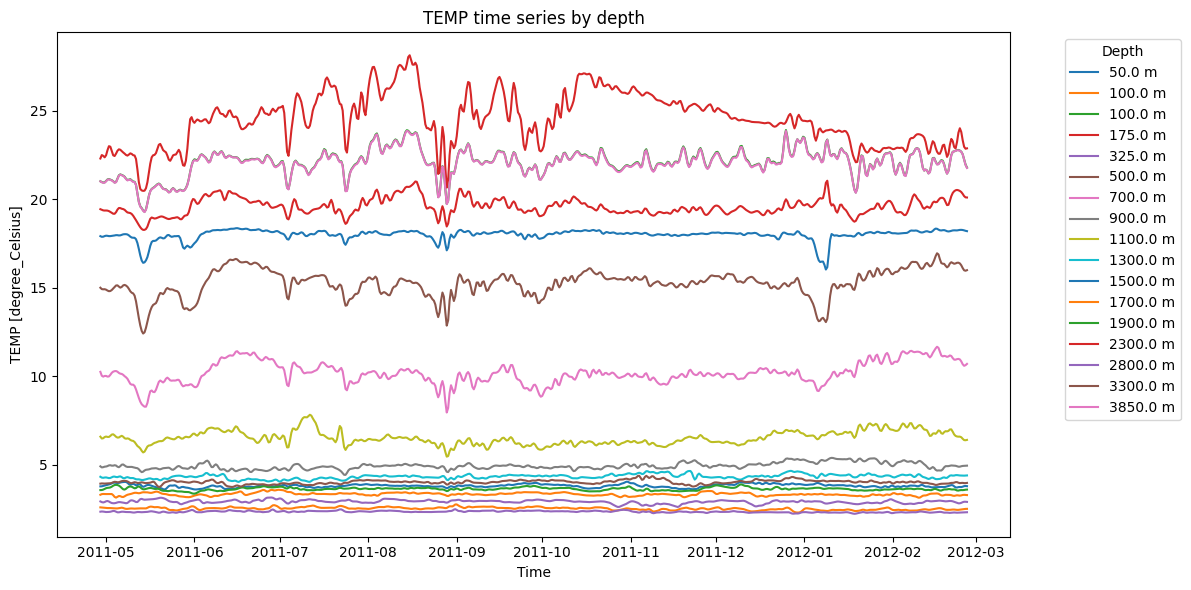

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

def plot_temp_timeseries_by_depth(ds, var="TEMP"):
    """
    Plot individual time series for each depth level.

    Parameters
    ----------
    ds : xarray.Dataset
        Dataset containing the variable to plot.
    var : str
        Variable name (default is "TEMP").
    """
    da = ds[var].squeeze()  # remove singleton lat/lon if present
    ds = ds.sortby("DEPTH")
    time = ds["TIME"].values
    depths = ds["DEPTH"].values

    plt.figure(figsize=(12, 6))

    for i, depth in enumerate(depths):
        # da[:, i] assumes dimensions are (TIME, DEPTH)
        series = da.isel(DEPTH=i)
        plt.plot(time, series, label=f"{depth:.1f} m")

    plt.xlabel("Time")
    plt.ylabel(f"{var} [{da.attrs.get('units', 'unknown')}]")
    plt.title(f"{var} time series by depth")
    plt.legend(title="Depth", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Plot the temperature time series by depth
plot_temp_timeseries_by_depth(ds_interp, var="TEMP")